# 逻辑回归
## 分类问题
- 逻辑回归算法
- KNN 近邻模型
- 决策树
- 神经网络
- 基本框架: $\begin{Bmatrix} y = f(x_1,x_2,···,x_n) \\ 判断为类别N，如果 y = n \\ \end{Bmatrix}$

## 逻辑回归
- 逻辑回归方程: $Y = \frac{1}{1+e^{-x}}$
- 概念: 用于解决分类问题的一种模型。根据数据特征或属性，计算其归属某一类别的概率$P(x)$,根据概率数值判断其所属类别。
- 主要应用场景：二分类问题
- 运用到高维二分问题：$P(x) = \frac{1}{1+e^{-x}} \qquad P(x) = \frac{1}{1+e^{-g(x)}} \qquad g(x) = \Theta_0 + \Theta_1x_1 + \Theta_2x_2 + ··· + \Theta_nx_n$
- 多为决策边界为边界划分线/面/更高维切分
- 其实就是来计算$\Theta_1、\Theta_2、···、\Theta_n$的值，用最小化损失函数：$minimize{\begin{Bmatrix} \frac{1}{2m} \sum_{i=1}^{m}{(y'_i - y_i)^2} \end{Bmatrix}}$
- 如果不连续，标签和预测结果都为离散点，使用该损失函数无法寻找极小值点
- 逻辑回归求解，最小化损失函数（j）
  - $J_i = \begin{Bmatrix} -log(P(x_i)),if y_i = 1 \\ \\ -log(1 - P(x_i)),if y_i = 0 \\ \end{Bmatrix}$
- 在程序中运行的最小损失函数:
  - $J = \frac{1}{m}\sum_{i = 1}^{m}{J_i} = -\frac{1}{m} \begin{bmatrix} \sum_{i = 1}^{m}{(y_i log(P(x_i)) + (1 - y_i) log(1 - P(x_i)))} \end{bmatrix}$
- 梯度下降法：
  - $j = f(p) \qquad p_{i+1} = p_i - \alpha\dfrac{\partial}{\partial p_i}f(p_i)$
  - 重复计算，直至收敛
  - $\begin{Bmatrix} temp_{\Theta_j} = \Theta_j - \alpha\dfrac{\partial}{\partial \Theta_j}J(\theta) \\ \\ \Theta_j = temp_{\Theta_j} \\ \end{Bmatrix}$
  - 求出 J 的最小值
- 模型评估
  - 准确率：$Accuracy = \frac{正确预测样本数量}{总样本数量}$

In [74]:
# 导入工具包
import pandas as pd
import numpy as np
# 导入展示工具包
from matplotlib import pyplot as plt
# 加载逻辑回归工具包
from sklearn.linear_model import LogisticRegression
# 加载模型评估工具包
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [75]:
# define f(x)
def f(x):
    a = theta4
    b = theta5 * x + theta2
    c = theta0 + theta1 * x + theta3 * x ** 2
    X2_new_boundary1 = (-b + np.sqrt(b**2 - 4 * a * c))/(2 * a)
    X2_new_boundary2 = (-b - np.sqrt(b**2 - 4 * a * c))/(2 * a)
    return X2_new_boundary1,X2_new_boundary2

## 实战1：考试通过预测

In [76]:
# load the data
data  = pd.read_csv("./data/data2.csv")
data.head()

,Exam1,Exam2,Pass
0,53.435804,64.239383,0
1,77.301930,64.104444,1
2,64.489986,34.331147,0
3,76.314033,78.968380,1
4,27.634133,73.941147,0


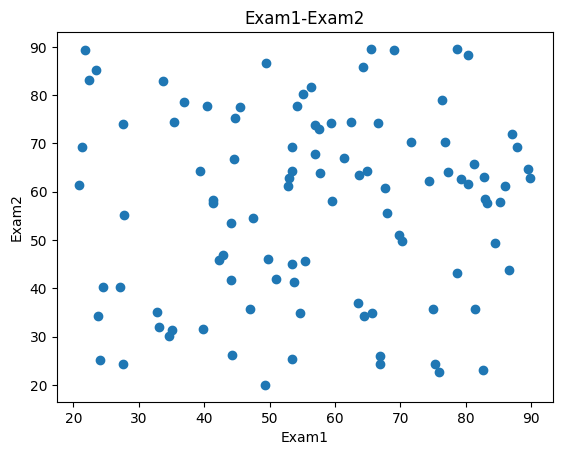

In [77]:
# visualize the data
fig1 = plt.figure()
plt.scatter(data.loc[:,"Exam1"],data.loc[:,"Exam2"])
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.show()

In [78]:
# add label mask
mask = data.loc[:,"Pass"] == 1
print(mask)

0     False
1      True
2     False
3      True
4     False
      ...  
95    False
96    False
97     True
98    False
99    False
Name: Pass, Length: 100, dtype: bool


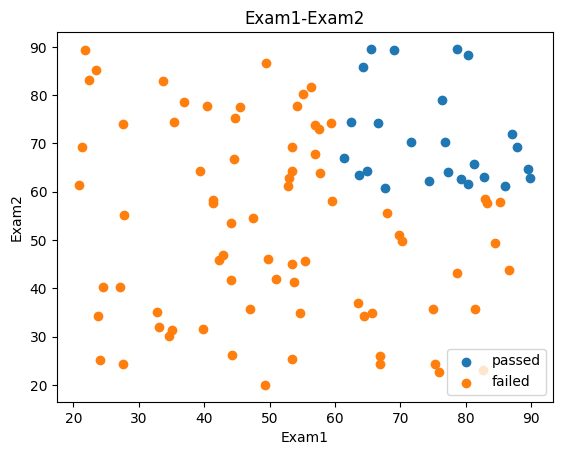

In [79]:
fig2 = plt.figure()
passed = plt.scatter(data.loc[:,"Exam1"][mask],data.loc[:,"Exam2"][mask])
failed = plt.scatter(data.loc[:,"Exam1"][~mask],data.loc[:,"Exam2"][~mask])
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed, failed), ("passed","failed"))
plt.show()

In [80]:
# define x,y
X = data.drop(["Pass"], axis=1)
y = data.loc[:,"Pass"]
X1 = data.loc[:,"Exam1"]
X2 = data.loc[:,"Exam2"]

In [81]:
print(X.shape,y.shape)

(100, 2) (100,)


In [82]:
# establish the model and train it
LR = LogisticRegression()
LR.fit(X,y)

LogisticRegression()

In [83]:
# show the predicted result and its accuracy
y_predict = LR.predict(X)
print(y_predict)

[0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [84]:
# 评估模型
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.92


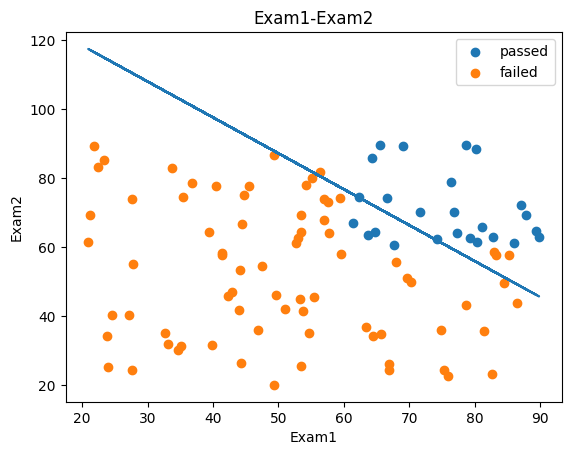

In [85]:
# 在图中画出边界曲线
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0],LR.coef_[0][1]
X2_new = -(theta0 + theta1 * X1)/theta2
fig3 = plt.figure()
passed = plt.scatter(data.loc[:,"Exam1"][mask],data.loc[:,"Exam2"][mask])
failed = plt.scatter(data.loc[:,"Exam1"][~mask],data.loc[:,"Exam2"][~mask])
## 画边界曲线
plt.plot(X1,X2_new)
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed, failed), ("passed","failed"))
plt.show()

In [86]:
# exam1=70 exam2=65,是否通过
y_test = LR.predict([[70,65]])
print("passed" if y_test==1 else "failed")

failed


In [87]:
# 优化模型（二阶边界函数）
# create new data
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2
X_new = {"X1":X1, "X2":X2,"X1_2":X1_2,"X2_2":X2_2,"X1_X2":X1_X2}
X_new = pd.DataFrame(X_new)

In [88]:
# establish new model and train
LR2 = LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression()

In [89]:
# 测试模型
y2_predict = LR2.predict(X_new)

In [90]:
# 查看模型评估
accuracy2 = accuracy_score(y,y2_predict)
print(accuracy2)

1.0


In [91]:
# 将 X1进行排序，以防边界曲线乱套
X1_new = X1.sort_values()

In [109]:
# 计算新边界
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0]
a = theta4
b = theta5 * X1_new + theta2
c = theta0 + theta1 * X1_new + theta3 * X1_new ** 2
X2_new_boundary = (-b + np.sqrt(b**2 - 4 * a * c))/(2 * a)

32   NaN
8    NaN
2    NaN
92   NaN
36   NaN
      ..
60   NaN
98   NaN
68   NaN
94   NaN
67   NaN
Name: test1, Length: 100, dtype: float64


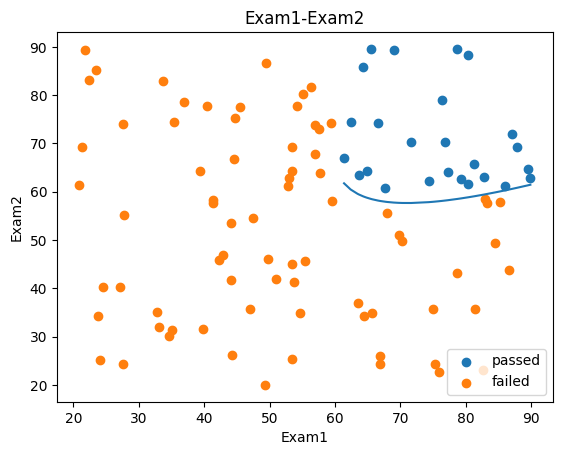

In [93]:
# 展示
fig4 = plt.figure()
passed = plt.scatter(data.loc[:,"Exam1"][mask],data.loc[:,"Exam2"][mask])
failed = plt.scatter(data.loc[:,"Exam1"][~mask],data.loc[:,"Exam2"][~mask])
## 画边界曲线
plt.plot(X1_new, X2_new_boundary)
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed, failed), ("passed","failed"))
plt.show()

## 芯片质量检测

In [94]:
# load data; 
# visualize data;
# generate new data
# establish model and train it;
# predict
# accuracy
# desision boundary
# define f(x)

In [95]:
# load the data
data  = pd.read_csv("./data/data3.csv")
data.head()

,test1,test2,pass
0,-0.130306,0.359560,0
1,0.175720,-0.415035,0
2,-0.917523,-0.040724,0
3,0.118920,0.659769,1
4,-0.334613,-0.174731,0


In [96]:
# add label mask
mask = data.loc[:,"pass"] == 1
print(mask)

0     False
1     False
2     False
3      True
4     False
      ...  
95    False
96     True
97    False
98    False
99    False
Name: pass, Length: 100, dtype: bool


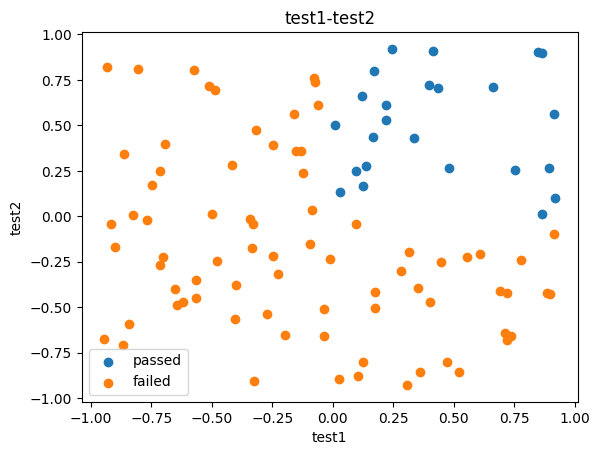

In [97]:
# 数据可视化
fig2 = plt.figure()
passed = plt.scatter(data.loc[:,"test1"][mask],data.loc[:,"test2"][mask])
failed = plt.scatter(data.loc[:,"test1"][~mask],data.loc[:,"test2"][~mask])
plt.title("test1-test2")
plt.xlabel("test1")
plt.ylabel("test2")
plt.legend((passed, failed), ("passed","failed"))
plt.show()

In [98]:
# define x,y
X = data.drop(["pass"], axis=1)
y = data.loc[:,"pass"]
X1 = data.loc[:,"test1"]
X2 = data.loc[:,"test2"]

In [99]:
# 优化模型（二阶边界函数）
# create new data
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2
X_new = {"X1":X1, "X2":X2,"X1_2":X1_2,"X2_2":X2_2,"X1_X2":X1_X2}
X_new = pd.DataFrame(X_new)

In [100]:
# establish new model and train
LR3 = LogisticRegression()
LR3.fit(X_new,y)

LogisticRegression()

In [101]:
# 测试模型
y3_predict = LR3.predict(X_new)

In [102]:
# 查看模型评估
accuracy3 = accuracy_score(y,y3_predict)
print(accuracy3)

0.94


In [103]:
# 将 X1进行排序，以防边界曲线乱套
X1_new = X1.sort_values()

In [104]:
# 计算新边界
theta0 = LR3.intercept_
theta1,theta2,theta3,theta4,theta5 = LR3.coef_[0]
a = theta4
b = theta5 * X1_new + theta2
c = theta0 + theta1 * X1_new + theta3 * X1_new ** 2
X2_new_boundary = (-b + np.sqrt(b**2 - 4 * a * c))/(2 * a)

In [105]:
X2_new_boundary_1 = []
X2_new_boundary_2 = []
for x in X1_new:
    X2_new_boundary_1.append(f(x)[0])
    X2_new_boundary_2.append(f(x)[1])

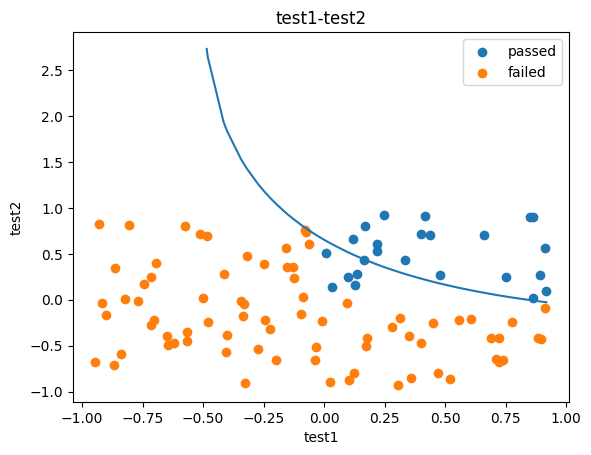

In [106]:
# 展示
fig5 = plt.figure()
passed = plt.scatter(data.loc[:,"test1"][mask],data.loc[:,"test2"][mask])
failed = plt.scatter(data.loc[:,"test1"][~mask],data.loc[:,"test2"][~mask])
## 画边界曲线
plt.plot(X1_new, X2_new_boundary)
plt.title("test1-test2")
plt.xlabel("test1")
plt.ylabel("test2")
plt.legend((passed, failed), ("passed","failed"))
plt.show()

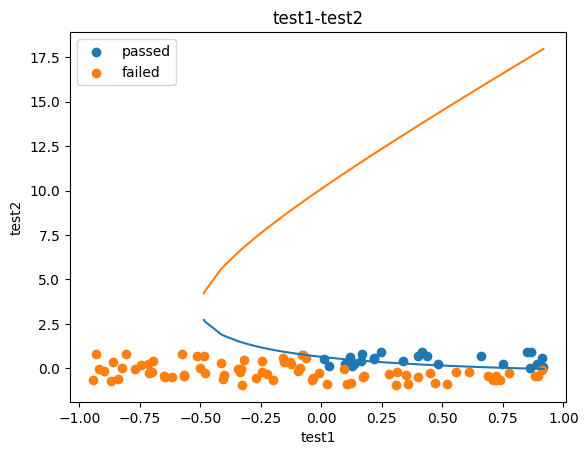

In [107]:
# 展示
fig6 = plt.figure()
passed = plt.scatter(data.loc[:,"test1"][mask],data.loc[:,"test2"][mask])
failed = plt.scatter(data.loc[:,"test1"][~mask],data.loc[:,"test2"][~mask])
## 画边界曲线
plt.plot(X1_new, X2_new_boundary_1)
plt.plot(X1_new, X2_new_boundary_2)
plt.title("test1-test2")
plt.xlabel("test1")
plt.ylabel("test2")
plt.legend((passed, failed), ("passed","failed"))
plt.show()

In [108]:
X1_range = [-0.9 + x/10000 for x in range(0,19000)]
X1_range = np.array(X1_range)

X2_new_boundary_1 = []
X2_new_boundary_2 = []
for x in X1_range:
    X2_new_boundary_1.append(f(x)[0])
    X2_new_boundary_2.append(f(x)[1])